In [19]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Зчитати файл із стоп-словами
with open('stopwords_ua.txt', 'r', encoding='utf-8') as f:
    stop_words_list = [line.strip().lower() for line in f]

# Зчитати очищений файл
df = pd.read_csv('pravda_data_cleaned.csv')

# Об'єднати всі значення в один рядок (якщо слова розділені пробілами)
text = ' '.join(df['Text'])

# Розділити текст на слова (враховуючи лише слова української мови)
words = re.findall(r'\b\w+\b', text, flags=re.UNICODE)

# Перетворити слова в нижній регістр
words = [word.lower() for word in words]

# Видаліть стоп-слова
filtered_words = [word for word in words if word not in stop_words_list]

# Створити DataFrame з результатами
df_word_freq = pd.DataFrame(filtered_words, columns=['Слово'])

# Знайти частоту кожного слова
word_freq = df_word_freq['Слово'].value_counts().reset_index()
word_freq.columns = ['Слово', 'Частота']

# Сортувати DataFrame по стовпцю 'Частота' у спадаючому порядку
df_word_freq_sorted = word_freq.sort_values(by='Частота', ascending=False).reset_index(drop=True)

# Зберегти очищений DataFrame у новий CSV файл
df_word_freq_sorted.to_csv('pravda_data_word_freq.csv')


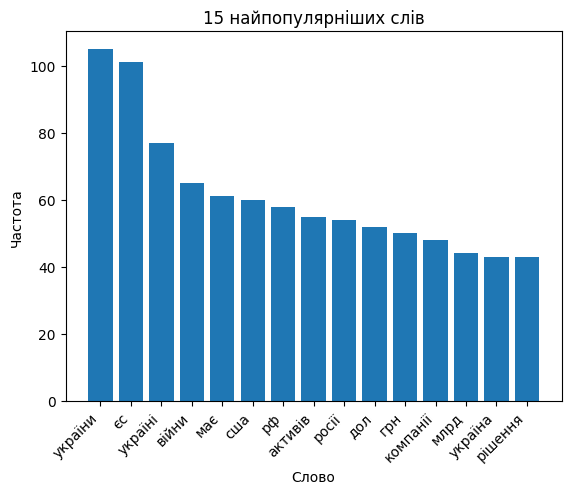

In [21]:
top_15_words = df_word_freq_sorted.head(15)
plt.bar(top_15_words['Слово'], top_15_words['Частота'])
plt.xlabel('Слово')
plt.ylabel('Частота')
plt.title('15 найпопулярніших слів')
plt.xticks(rotation=45, ha='right')
plt.show()


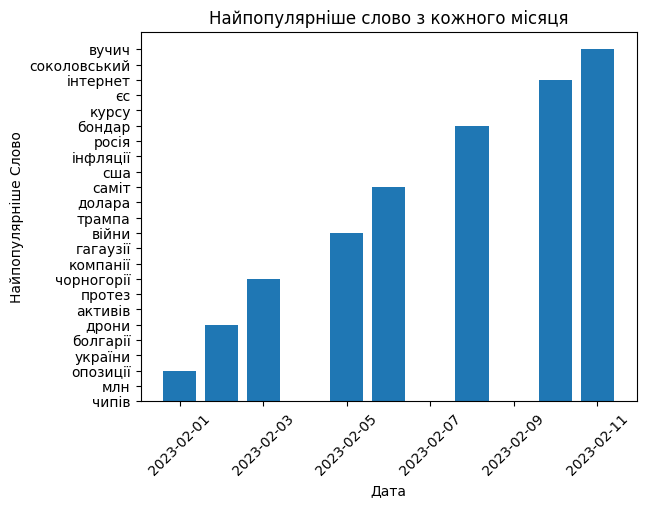

In [30]:


df = pd.read_csv('pravda_data_cleaned.csv', parse_dates=['Date'])

def get_most_popular_word(row):
    words = re.findall(r'\b\w+\b', row, flags=re.UNICODE)
    words = [word.lower() for word in words]
    filtered_words = [word for word in words if word not in stop_words_list]
    word_freq = pd.Series(filtered_words).value_counts().reset_index()
    word_freq.columns = ['Слово', 'Частота']
    most_popular_word = word_freq.iloc[0]['Слово']
    return most_popular_word

df['Найпопулярніше Слово'] = df['Text'].apply(get_most_popular_word)

plt.bar(df['Date'], df['Найпопулярніше Слово'])
plt.xlabel('Дата')
plt.ylabel('Найпопулярніше Слово')
plt.title('Найпопулярніше слово з кожного місяця')
plt.xticks(rotation=45)
plt.show()
